In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
from citipy import citipy

In [5]:
# from API_practice ipynb file
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# 6.2.6 Get the City Weather Data
import requests
# weather api key
from config import weather_api_key 

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | bantry
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | vanimo
Processing Record 6 of Set 1 | waddan
Processing Record 7 of Set 1 | bowen
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | kokopo
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | roald
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | kasulu
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | hualmay
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | cape town
Pro

Processing Record 39 of Set 4 | craig
Processing Record 40 of Set 4 | ballina
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | santa cruz
Processing Record 43 of Set 4 | kandalaksha
Processing Record 44 of Set 4 | cap malheureux
Processing Record 45 of Set 4 | qianan
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | ovalle
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | zyryanka
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | tabou
Processing Record 2 of Set 5 | oussouye
Processing Record 3 of Set 5 | amuntai
Processing Record 4 of Set 5 | honiara
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | clyde river
Processing Record 9 of Set 5 | arlit
Processing Record 10 of Set 5 | nantucket
Processing Record 11 of Set 5 | henties bay
Processing Record 12 of Set 5 | sa

Processing Record 27 of Set 8 | mehamn
Processing Record 28 of Set 8 | estelle
Processing Record 29 of Set 8 | seguela
Processing Record 30 of Set 8 | portlethen
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | port blair
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | ahome
Processing Record 35 of Set 8 | mamontovo
Processing Record 36 of Set 8 | puerto pinasco
City not found. Skipping...
Processing Record 37 of Set 8 | puerto narino
Processing Record 38 of Set 8 | yanam
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | palasa
Processing Record 41 of Set 8 | capitao poco
Processing Record 42 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 8 | viligili
City not found. Skipping...
Processing Record 44 of Set 8 | farmington
Processing Record 45 of Set 8 | wilmington
Processing Record 46 of Set 8 | grandview
Processing Record 47 of Set 8 | sungaipenuh
Processing Record 48 of Set 8 | palmas
P

Processing Record 14 of Set 12 | shiyan
Processing Record 15 of Set 12 | mandalgovi
Processing Record 16 of Set 12 | wajima
Processing Record 17 of Set 12 | warqla
City not found. Skipping...
Processing Record 18 of Set 12 | suicheng
Processing Record 19 of Set 12 | fort nelson
Processing Record 20 of Set 12 | taybad
Processing Record 21 of Set 12 | norfolk
Processing Record 22 of Set 12 | nanakuli
Processing Record 23 of Set 12 | jiddah
City not found. Skipping...
Processing Record 24 of Set 12 | dancheng
Processing Record 25 of Set 12 | cradock
Processing Record 26 of Set 12 | itarema
Processing Record 27 of Set 12 | steinbach
Processing Record 28 of Set 12 | yumen
Processing Record 29 of Set 12 | aksu
Processing Record 30 of Set 12 | voh
Processing Record 31 of Set 12 | tsaratanana
Processing Record 32 of Set 12 | atar
Processing Record 33 of Set 12 | brigantine
Processing Record 34 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 35 of Set 12 | lazaro cardenas


In [11]:
len(city_data)

544

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,58.66,44,20,14.97,AR,2022-11-13 19:33:09
1,Nikolskoye,59.7035,30.7861,40.91,79,100,5.53,RU,2022-11-13 19:33:09
2,Bantry,51.6833,-9.4500,54.79,87,100,2.98,IE,2022-11-13 19:33:10
3,Pevek,69.7008,170.3133,-17.84,98,80,5.95,RU,2022-11-13 19:33:10
4,Vanimo,-2.6741,141.3028,77.67,89,98,3.56,PG,2022-11-13 19:33:10
5,Waddan,29.1614,16.1390,66.78,40,30,6.04,LY,2022-11-13 19:33:11
6,Bowen,-20.0167,148.2333,77.00,68,91,8.63,AU,2022-11-13 19:33:11
7,Bluff,-46.6000,168.3333,49.64,78,25,6.64,NZ,2022-11-13 19:33:12
8,Busselton,-33.6500,115.3333,47.26,84,0,9.69,AU,2022-11-13 19:33:12
9,Kokopo,-4.3520,152.2633,78.13,82,65,2.46,PG,2022-11-13 19:33:13


In [13]:
# Change column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-11-13 19:33:09,-54.8000,-68.3000,58.66,44,20,14.97
1,Nikolskoye,RU,2022-11-13 19:33:09,59.7035,30.7861,40.91,79,100,5.53
2,Bantry,IE,2022-11-13 19:33:10,51.6833,-9.4500,54.79,87,100,2.98
3,Pevek,RU,2022-11-13 19:33:10,69.7008,170.3133,-17.84,98,80,5.95
4,Vanimo,PG,2022-11-13 19:33:10,-2.6741,141.3028,77.67,89,98,3.56
...,...,...,...,...,...,...,...,...,...
539,Maldonado,UY,2022-11-13 19:48:07,-34.6667,-54.9167,73.22,78,100,13.22
540,Prokhorovka,RU,2022-11-13 19:48:08,51.0374,36.7325,44.17,74,96,15.39
541,Bertinoro,IT,2022-11-13 19:48:08,44.1469,12.1389,51.78,89,40,2.30
542,Ustyuzhna,RU,2022-11-13 19:48:08,58.8394,36.4321,32.11,74,46,12.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# 6.3.1 Plot Latitude vs Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1668368890.0753212

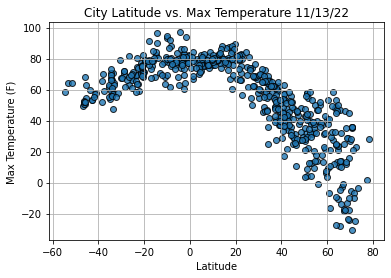

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

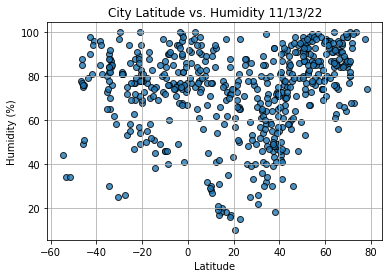

In [18]:
# 6.3.2 Plot Latitude vs Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

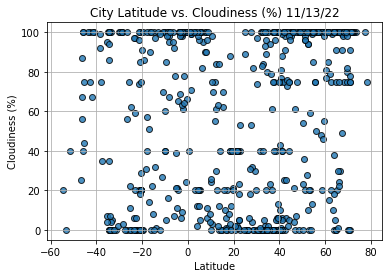

In [19]:
# 6.3.3 Plot Latitude vs Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

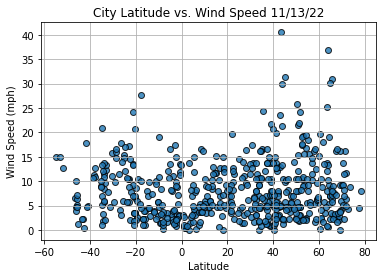

In [20]:
# 6.3.4 Plot Latitude vs Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# 6.4.2 Find the Correlation between Latitude & Maximum Temperature
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
539    False
540     True
541     True
542     True
543     True
Name: Lat, Length: 544, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nikolskoye,RU,2022-11-13 19:33:09,59.7035,30.7861,40.91,79,100,5.53
2,Bantry,IE,2022-11-13 19:33:10,51.6833,-9.4500,54.79,87,100,2.98
3,Pevek,RU,2022-11-13 19:33:10,69.7008,170.3133,-17.84,98,80,5.95
5,Waddan,LY,2022-11-13 19:33:11,29.1614,16.1390,66.78,40,30,6.04
10,Lompoc,US,2022-11-13 19:30:52,34.6391,-120.4579,66.02,48,0,10.36
...,...,...,...,...,...,...,...,...,...
538,Belyy Yar,RU,2022-11-13 19:48:06,53.6039,91.3903,39.09,73,0,15.66
540,Prokhorovka,RU,2022-11-13 19:48:08,51.0374,36.7325,44.17,74,96,15.39
541,Bertinoro,IT,2022-11-13 19:48:08,44.1469,12.1389,51.78,89,40,2.30
542,Ustyuzhna,RU,2022-11-13 19:48:08,58.8394,36.4321,32.11,74,46,12.50


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nikolskoye,RU,2022-11-13 19:33:09,59.7035,30.7861,40.91,79,100,5.53
2,Bantry,IE,2022-11-13 19:33:10,51.6833,-9.4500,54.79,87,100,2.98
3,Pevek,RU,2022-11-13 19:33:10,69.7008,170.3133,-17.84,98,80,5.95
5,Waddan,LY,2022-11-13 19:33:11,29.1614,16.1390,66.78,40,30,6.04
10,Lompoc,US,2022-11-13 19:30:52,34.6391,-120.4579,66.02,48,0,10.36


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

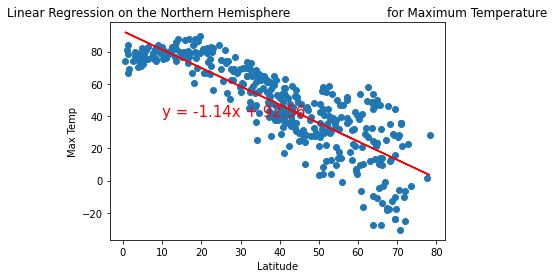

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

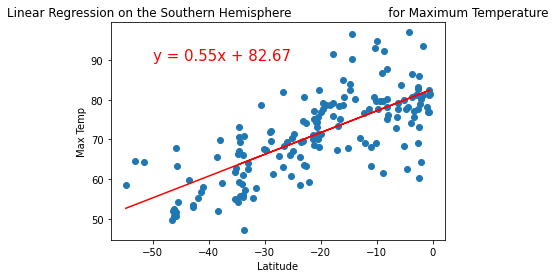

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

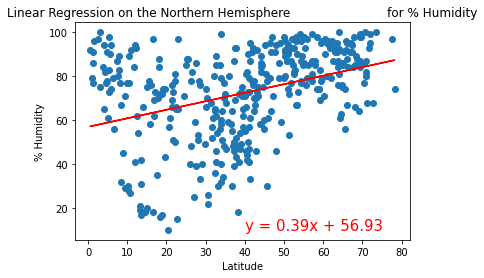

In [34]:
# 6.4.3 Correlation between latitude & Percent Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

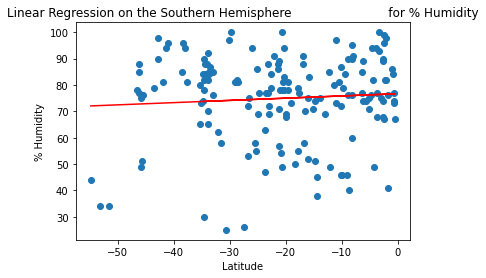

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# 6.4.4 Correlation between Latitude & Percent Cloudiness